In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings("ignore")

## Loading In The Data

In [4]:
data = pd.read_csv("documents/datasets_for_data_science/train_beginner umooja.csv")

data.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0


In [5]:
data.shape

(297177, 7)

Data has 297,177 rows and 7 columns, target column is Offset_fault

In [6]:
data.Offset_fault.unique()

array([0, 1], dtype=int64)

Problem is Classification
So we have 6 useful Features and One target Column, ID, isn't a useful feature

## Exploratory Data Analysis 

In [7]:
data.describe()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,293563.000000,293563.000000,293628.000000,293628.000000,297177.000000
mean,40.751195,38.183018,23.316554,78.653623,0.371072
std,28.526182,28.647761,3.836971,14.772725,0.483092
min,-9.450000,-9.700000,16.700000,27.000000,0.000000
25%,22.430000,19.520000,20.400000,68.000000,0.000000
50%,36.470000,33.720000,21.900000,84.000000,0.000000
75%,49.420000,47.570000,26.300000,91.000000,1.000000
max,997.960000,997.260000,34.900000,99.000000,1.000000


Sensor1 and 2 looks to be having outliers, from the difference between mean and max_values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 297177 non-null  object 
 1   Datetime           297177 non-null  object 
 2   Sensor1_PM2.5      293563 non-null  float64
 3   Sensor2_PM2.5      293563 non-null  float64
 4   Temperature        293628 non-null  float64
 5   Relative_Humidity  293628 non-null  float64
 6   Offset_fault       297177 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.9+ MB


In [10]:
data_datetime = data.drop(columns = "ID").set_index("Datetime")
data_datetime

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
Datetime,,,,,
2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0
...,...,...,...,...,...
2021-11-19 12:32:00,36.40,37.77,28.6,62.0,0
2021-11-22 01:22:54,50.12,40.63,21.6,86.0,1
2021-11-05 01:27:31,53.68,45.23,20.2,94.0,1


In [17]:
data_datetime.index = pd.to_datetime(data_datetime.index)

<AxesSubplot:xlabel='Datetime'>

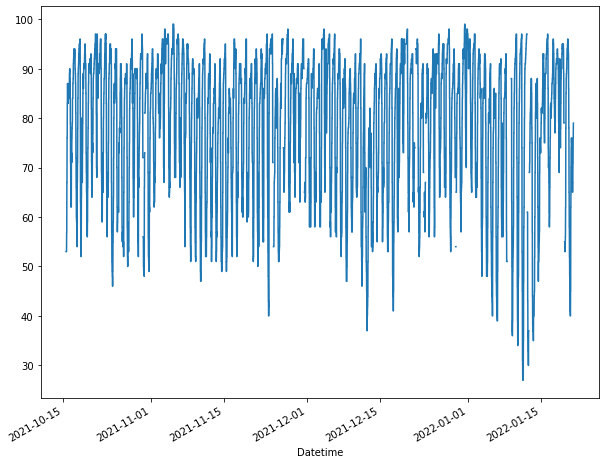

In [18]:
data_datetime["Relative_Humidity"].plot()

<AxesSubplot:xlabel='Datetime'>

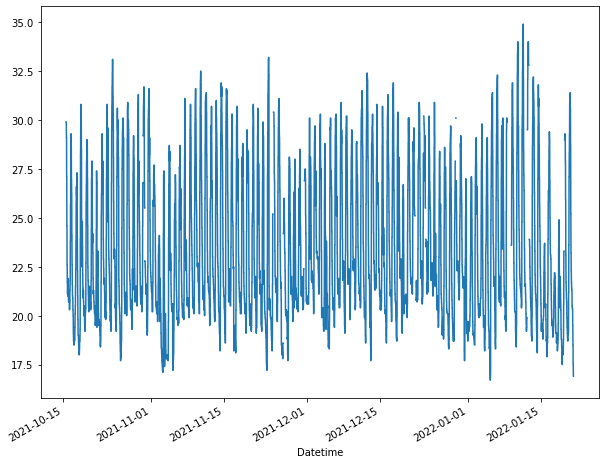

In [20]:
data_datetime['Temperature'].plot()

No obvious Changes with datetime for both temperature and relative humidity, There is stationarity

In [28]:
#Lets confirm stationarity USing statistical tests - Augmented Dickey-Filler Test

from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

#adf_test(data_datetime['Temperature'])

"""null values prevent us from carrying out this test we will go on trusting our visual check decision"""

'null values prevent us from carrying out this test we will go on trusting our visual check decision'

In [16]:
data['Datetime'] = pd.to_datetime(data["Datetime"])

day = data['Datetime'].dt.day
month = data['Datetime'].dt.month
year = data['Datetime'].dt.year

In [29]:
data['day'],data['month'],data['year'] = day,month,year

data.head(20)

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault,day,month,year
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0,3,11,2021
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0,8,11,2021
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0,7,11,2021
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0,1,1,2022
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0,5,11,2021
5,ID_1A9CVG5BBKRT,2022-01-13 09:07:32,27.58,18.92,26.1,57.0,1,13,1,2022
6,ID_O598XNF3QQ7H,2021-12-18 02:25:06,43.62,34.62,20.6,86.0,1,18,12,2021
7,ID_MUEQIKPY6X5O,2021-11-11 04:18:59,104.35,98.00,20.3,94.0,0,11,11,2021
8,ID_YOGZ8Q8O97ON,2021-12-19 06:17:43,19.22,13.25,19.3,92.0,1,19,12,2021
9,ID_FR804PILRAZ0,2022-01-01 16:19:02,2.02,5.22,27.1,66.0,0,1,1,2022


In [31]:
ID = data['ID']

data.drop(columns='ID',inplace=True)

Let's make some more visualization plots

In [33]:
data.columns = data.columns.str.lower()
data.rename(columns ={'sensor1_pm2.5':'sensor1','sensor2_pm2.5':'sensor2'},inplace=True) #renaming columns to make life easier

data

,datetime,sensor1,sensor2,temperature,relative_humidity,offset_fault,day,month,year
0,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0,3,11,2021
1,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0,8,11,2021
2,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0,7,11,2021
3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0,1,1,2022
4,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0,5,11,2021
...,...,...,...,...,...,...,...,...,...
297172,2021-11-19 12:32:00,36.40,37.77,28.6,62.0,0,19,11,2021
297173,2021-11-22 01:22:54,50.12,40.63,21.6,86.0,1,22,11,2021
297174,2021-11-05 01:27:31,53.68,45.23,20.2,94.0,1,5,11,2021
297175,2021-11-23 22:09:30,96.45,114.67,20.6,93.0,0,23,11,2021


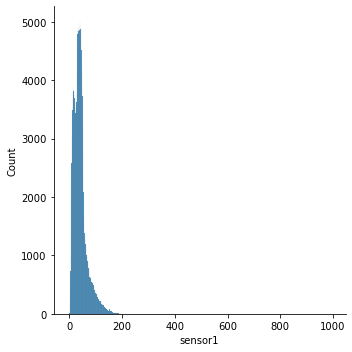

In [37]:
sns.displot(data['sensor1'])

data follows exponential growth, since sensor1 and sensor2 are similar, we expect both to have similar distribution

<AxesSubplot:xlabel='offset_fault', ylabel='count'>

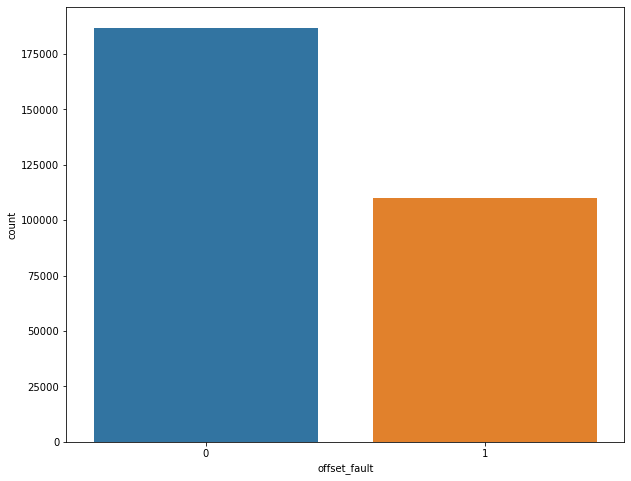

In [38]:
sns.countplot(x='offset_fault',data=data)

In [40]:
data.offset_fault.value_counts(normalize=True)

0    0.628928
1    0.371072
Name: offset_fault, dtype: float64

data is slightly imbalanced but ok, we will use techniques such as performance metrics and stratification to counter this effect

<AxesSubplot:xlabel='temperature', ylabel='Density'>

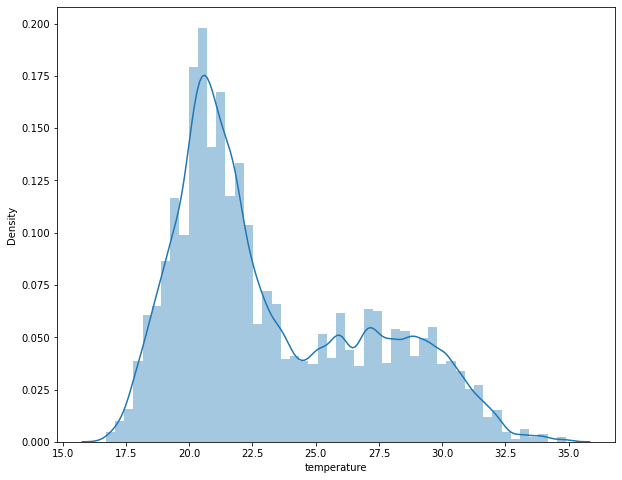

In [41]:
sns.distplot(data.temperature)

<AxesSubplot:xlabel='relative_humidity', ylabel='Density'>

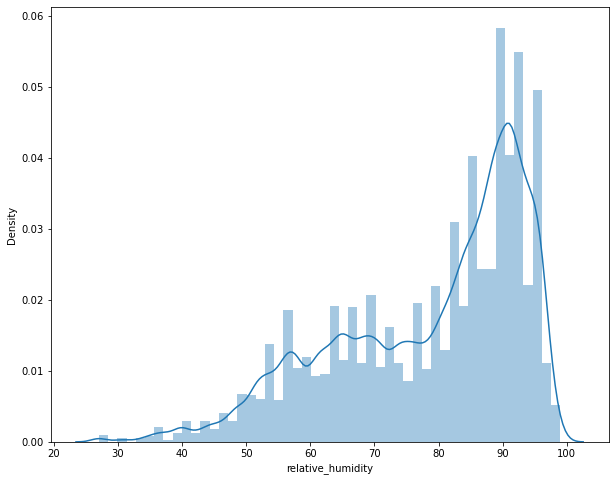

In [43]:
sns.distplot(data.relative_humidity)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   datetime           297177 non-null  datetime64[ns]
 1   sensor1            293563 non-null  float64       
 2   sensor2            293563 non-null  float64       
 3   temperature        293628 non-null  float64       
 4   relative_humidity  293628 non-null  float64       
 5   offset_fault       297177 non-null  int64         
 6   day                297177 non-null  int64         
 7   month              297177 non-null  int64         
 8   year               297177 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 20.4 MB


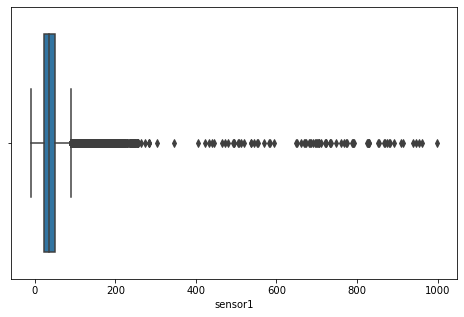

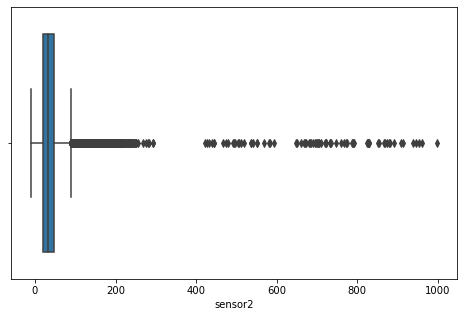

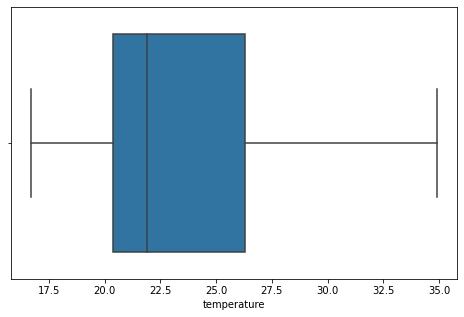

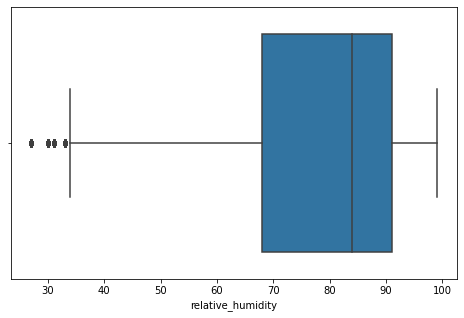

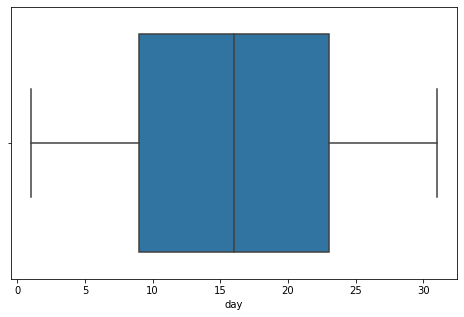

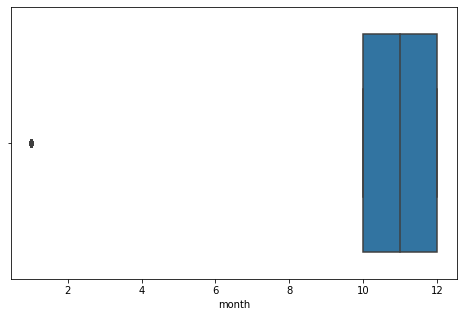

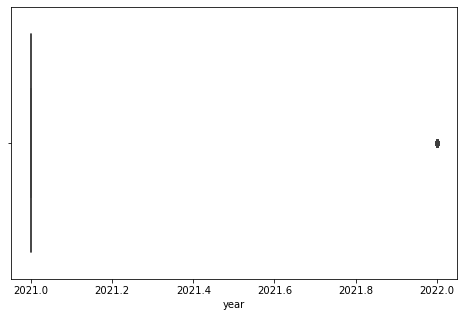

In [69]:
# fig, ax = plt.subplots(2, 4)

# # Flatten the ax array
# ax = ax.flatten()

# Loop through the columns of the data and plot each column on a separate subplot
for num, col in enumerate(data.drop(columns=['offset_fault','datetime']).columns):
    plt.figure(figsize=(8,5))
    sns.boxplot(x=col, data=data)
    plt.show()
    
# Hide the empty subplot
# ax[-1].axis('off')



Outliers exist for month, sensor1, sensor2 and relative humidity

<AxesSubplot:xlabel='offset_fault', ylabel='temperature'>

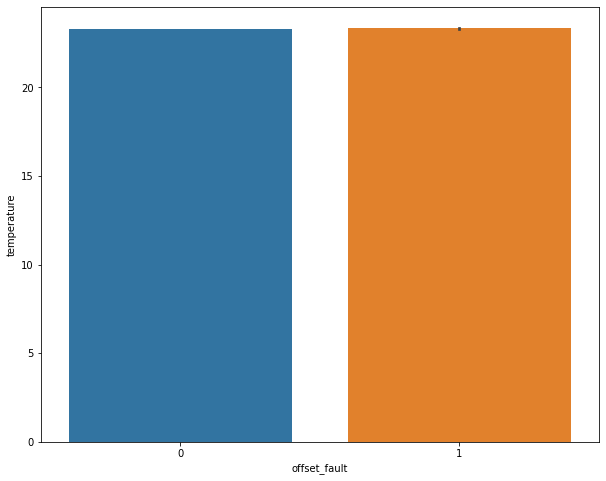

In [75]:
sns.barplot(x='offset_fault',y='temperature',data=data)

not much dependence on temperature, let's do a pairplot to see plenty relations

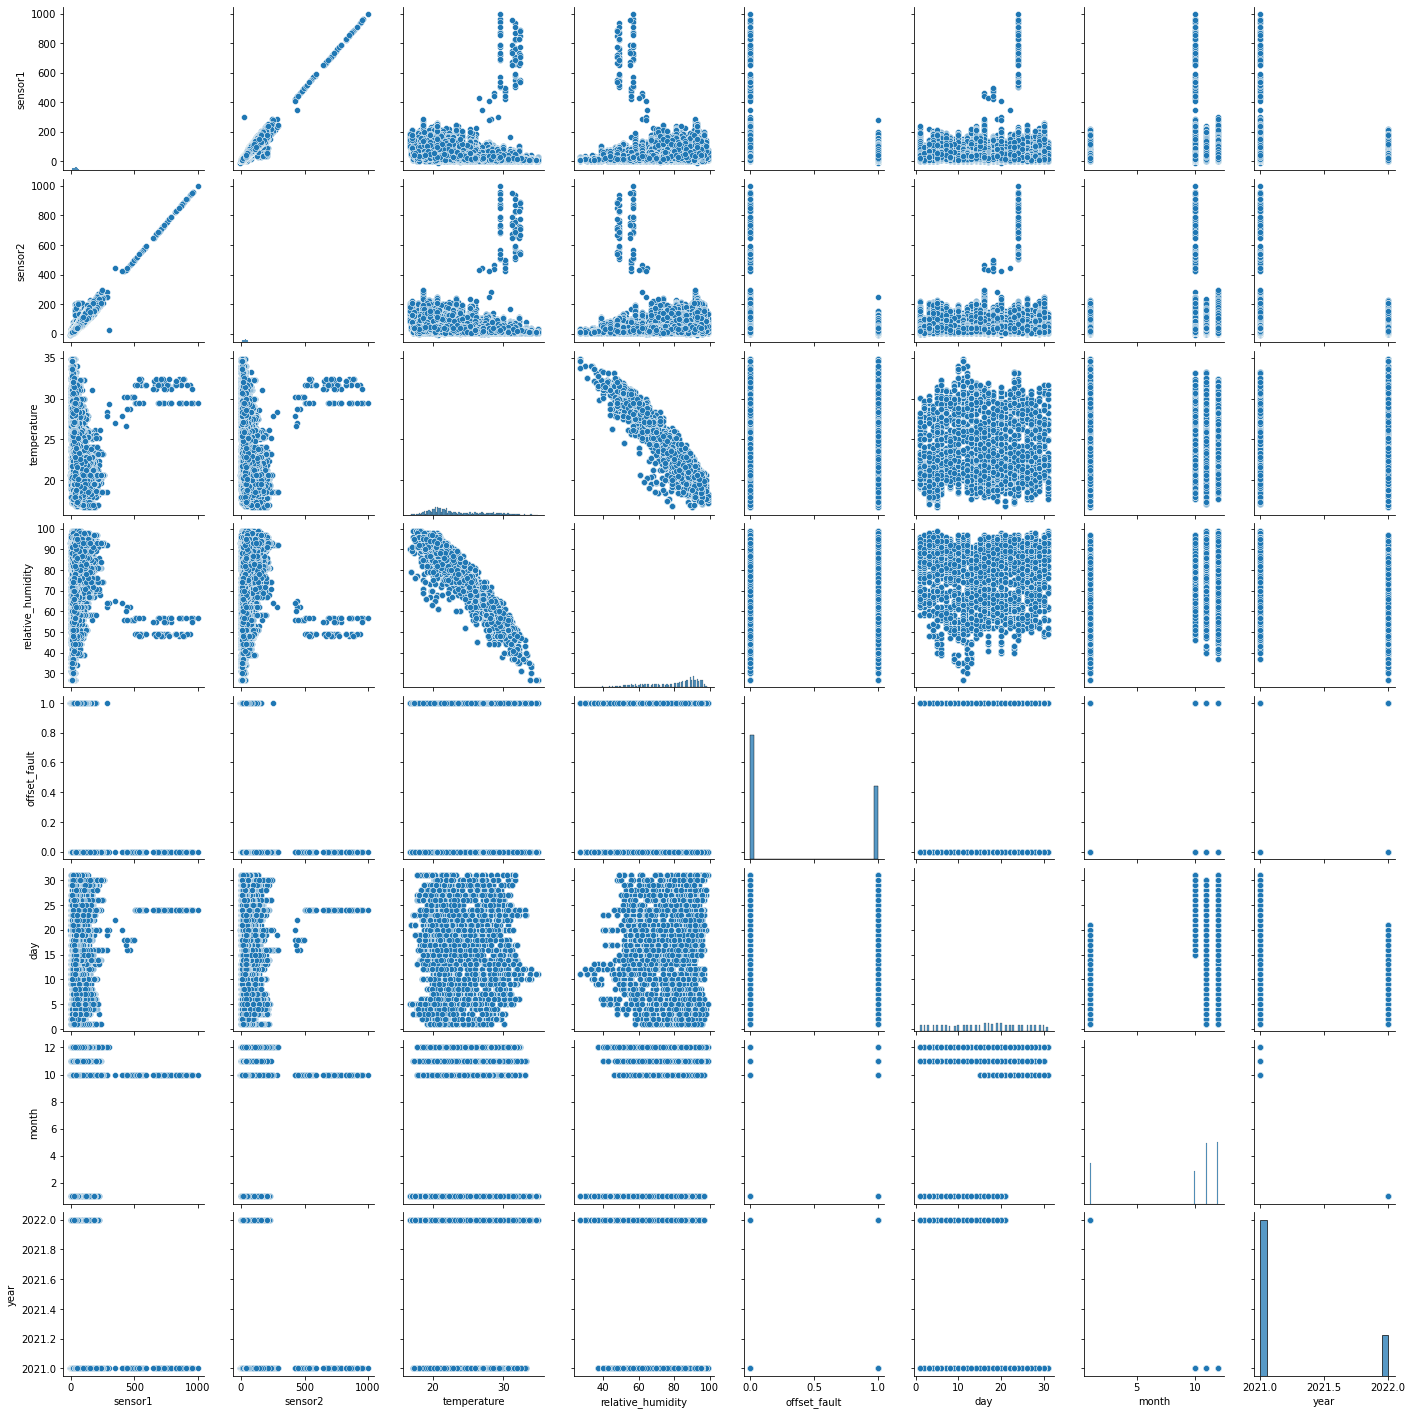

In [76]:
sns.pairplot(data)

<AxesSubplot:>

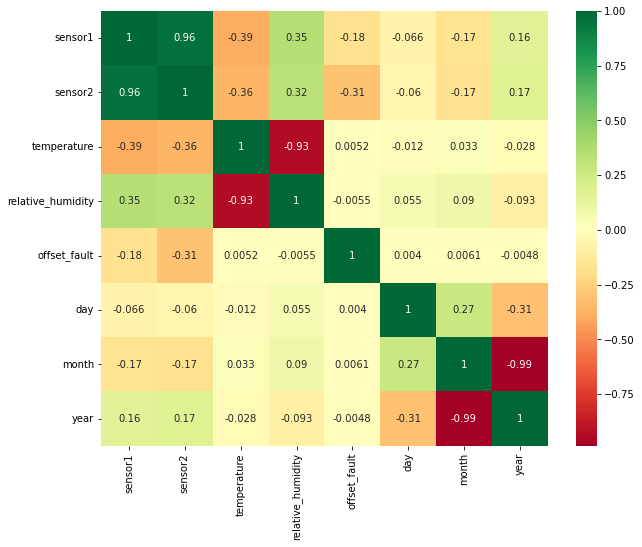

In [77]:
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

High Correlation bettern sensor 1 and 2, also between temperature and relative_humidity, lastly between month and year

We End Our Exploration Here!!!

In [ ]:
data_exploration = data.to_csv("data_exploration.csv")
data_timeseries = data_datetime.to_csv("data_timeseries.csv")